In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
import pandas as pd
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [4]:
df[:10]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [5]:
df['target'] = digits.target

In [36]:
x = df.drop(['target'], axis = 'columns')
y = df.target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
clf = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': [x for x in range(10)]}, cv = 3)

In [43]:
clf.fit(x_train, y_train)
clf.best_params_

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

{'n_neighbors': 5}

In [44]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
model.score(x_test, y_test)

0.9861111111111112

In [46]:
y_pred = model.predict(x_test)
y_pred[:3]

array([9, 9, 0])

In [55]:
y_test.values[:3]

array([9, 9, 0])

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:
cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Predicted')

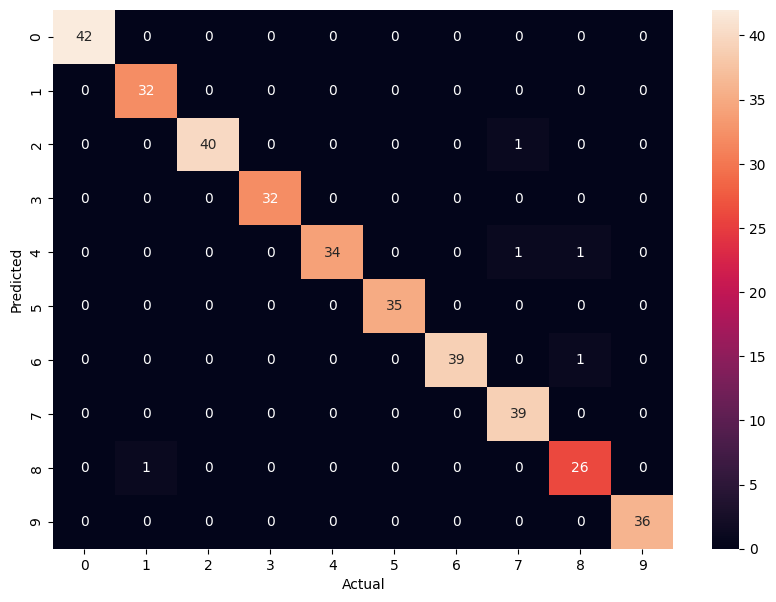

In [59]:
import seaborn as sn
plt.figure(figsize = [10, 7])
sn.heatmap(cm, annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.98        32
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        32
           4       1.00      0.94      0.97        36
           5       1.00      1.00      1.00        35
           6       1.00      0.97      0.99        40
           7       0.95      1.00      0.97        39
           8       0.93      0.96      0.95        27
           9       1.00      1.00      1.00        36

    accuracy                           0.99       360
   macro avg       0.98      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

